In [ ]:
#! pip install cbsodata

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata 

In [28]:
# Downloading table list
toc = pd.DataFrame(cbsodata.get_table_list())

# Downloading entire dataset (can take up to 30s)
gezondhied_df = pd.DataFrame(cbsodata.get_data('85012NED'))
mean_verkoopprijs_df = pd.DataFrame(cbsodata.get_data('83625NED'))
pd.set_option('display.max_rows', gezondhied_df.shape[0]+1) #max aantal rows

In [4]:
#functie om outliers verwijderen 
def column_outlier(strength, dataframe, columns):
    temp_dataframe = dataframe.copy()
    try:
        if strength == 's':
            strength=3
        elif strength == 'a':
            strength=1.5
    except:
        print("Invalid strength")
    for column in columns:
        Q1 = temp_dataframe[column].quantile(0.25)
        Q3 = temp_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        temp_dataframe = temp_dataframe[~((temp_dataframe[column] < (Q1 - strength * IQR)) |(temp_dataframe[column] > (Q3 + strength* IQR)))]
    return temp_dataframe

In [5]:
print(f'Voordat we de null-waardes droppen hebben we: {len(gezondhied_df)}  in de dataset')
print(gezondhied_df.isnull().sum())
gezondhied_df.dropna(inplace=True)
print(f'Nadat we de null-waardes droppen hebben we: {len(gezondhied_df)} in de  dataset')

Voordat we de null-waardes droppen hebben we: 3582  in de dataset
ID                                         0
Leeftijd                                   0
Marges                                     0
RegioS                                     0
ErvarenGezondheidGoedZeerGoed_1           18
EenOfMeerLangdurigeAandoeningen_2         21
EenOfMeerLichamelijkeBeperkingen_3        21
BeperkingInHoren_4                        21
BeperkingInZien_5                         21
BeperkingInBewegen_6                      21
Ondergewicht_7                            30
NormaalGewicht_8                          21
Overgewicht_9                             21
MatigOvergewicht_10                       21
ErnstigOvergewichtObesitas_11             21
VoldoetAanBeweegrichtlijn_12             273
WekelijksSporter_13                      273
Mantelzorger_14                           21
ZwaarBelasteMantelzorgers_15            1437
UrenMantelzorgPerWeek_16                1491
Rokers_17                         

In [6]:
print(f'Voordat we de null-waardes droppen hebben we: {len(mean_verkoopprijs_df)}  in de dataset')
print(mean_verkoopprijs_df.isnull().sum())
mean_verkoopprijs_df.dropna(inplace=True)
print(f'Nadat we de null-waardes droppen hebben we: {len(mean_verkoopprijs_df)} in de  dataset')

Voordat we de null-waardes droppen hebben we: 20007  in de dataset
ID                             0
RegioS                         0
Perioden                       0
GemiddeldeVerkoopprijs_1    7169
dtype: int64
Nadat we de null-waardes droppen hebben we: 12838 in de  dataset


In [8]:
mean_ErnstigOvergewichtObesitas_11_df = column_outlier('a', gezondhied_df.copy(), ['ErnstigOvergewichtObesitas_11'])[['ErnstigOvergewichtObesitas_11', 'RegioS']].groupby('RegioS', as_index = False).mean()
mean_ErnstigOvergewichtObesitas_11_df.sort_values(by ='ErnstigOvergewichtObesitas_11' , ascending=False)

,RegioS,ErnstigOvergewichtObesitas_11
274,Stadskanaal,21.800000
168,Kerkrade,21.516667
48,Brunssum,21.183333
288,Twenterand,21.166667
61,Delfzijl,21.100000
144,Heerlen,20.855556
340,Zevenaar,20.633333
174,Landgraaf,20.525000
277,Steenbergen,20.500000
208,Neder-Betuwe,20.300000


In [9]:
mean_VoldoetAanBeweegrichtlijn_12_df = column_outlier('a', gezondhied_df.copy(), ['VoldoetAanBeweegrichtlijn_12'])[['VoldoetAanBeweegrichtlijn_12', 'RegioS']].groupby('RegioS', as_index = False).mean()
mean_VoldoetAanBeweegrichtlijn_12_df.sort_values(by ='VoldoetAanBeweegrichtlijn_12' , ascending=True)

,RegioS,VoldoetAanBeweegrichtlijn_12
168,Kerkrade,36.971429
253,Ridderkerk,37.833333
170,Krimpen aan den IJssel,38.533333
274,Stadskanaal,39.766667
128,Gulpen-Wittem,39.900000
265,Simpelveld,39.966667
174,Landgraaf,40.200000
21,Barendrecht,40.266667
194,Maassluis,40.466667
144,Heerlen,40.542857


In [10]:
mean_VoldoetAanRichtlijnAlcoholgebruik_18_df = column_outlier('a', gezondhied_df.copy(), ['VoldoetAanRichtlijnAlcoholgebruik_18'])[['VoldoetAanRichtlijnAlcoholgebruik_18', 'RegioS']].groupby('RegioS', as_index = False).mean()
mean_VoldoetAanRichtlijnAlcoholgebruik_18_df.sort_values(by ='VoldoetAanRichtlijnAlcoholgebruik_18' , ascending=False)

,RegioS,VoldoetAanRichtlijnAlcoholgebruik_18
6,Alblasserdam,55.766667
183,Lelystad,55.366667
170,Krimpen aan den IJssel,54.900000
341,Zoetermeer,54.288889
10,Almere,54.266667
165,Kampen,53.983333
253,Ridderkerk,53.800000
89,Flevoland (PV),53.577778
94,GGD Flevoland (GG),53.577778
249,Reimerswaal,53.566667


<AxesSubplot:xlabel='VoldoetAanRichtlijnAlcoholgebruik_18', ylabel='RegioS'>

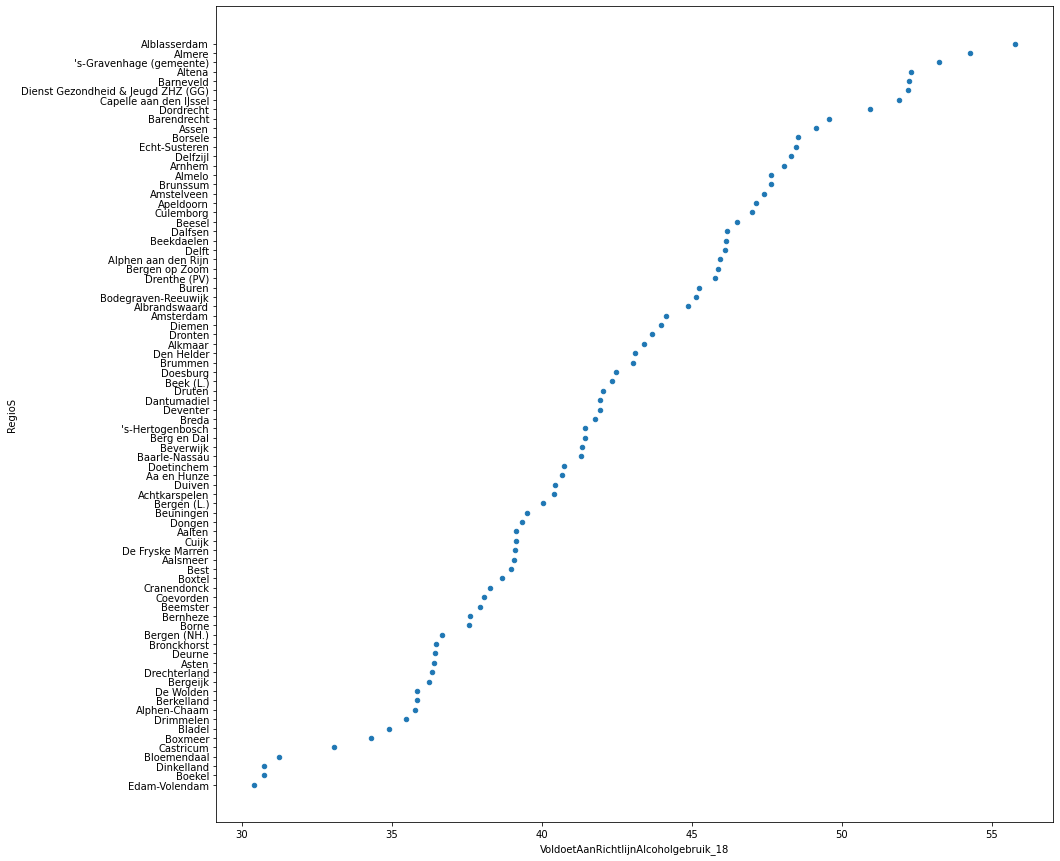

In [26]:
#Plot de data
x = 'VoldoetAanRichtlijnAlcoholgebruik_18'
y = 'RegioS'

tplot = mean_VoldoetAanRichtlijnAlcoholgebruik_18_df[['VoldoetAanRichtlijnAlcoholgebruik_18','RegioS']].head(80)
tplot.sort_values(['VoldoetAanRichtlijnAlcoholgebruik_18'], ascending=True, inplace=True)
tplot.dropna(inplace=True)

tplot.plot(x=x, y=y, kind='scatter',figsize=(15,15))

In [33]:
mean_verkoopprijs_df


,ID,RegioS,Perioden,GemiddeldeVerkoopprijs_1
0,0,Nederland,1995,93750.0
1,1,Nederland,1996,102607.0
2,2,Nederland,1997,113163.0
3,3,Nederland,1998,124540.0
4,4,Nederland,1999,144778.0
...,...,...,...,...
20002,20002,Zwolle,2017,245803.0
20003,20003,Zwolle,2018,279684.0
20004,20004,Zwolle,2019,293098.0
20005,20005,Zwolle,2020,315874.0


In [50]:
s = mean_verkoopprijs_df.groupby(['RegioS'])['GemiddeldeVerkoopprijs_1'].mean()
s

RegioS
's-Graveland                      195411.000000
's-Gravendeel                     156128.416667
's-Gravenhage (gemeente)          206490.000000
's-Gravenmoer                     114029.500000
's-Gravenzande                    170823.555556
's-Hertogenbosch                  242949.333333
Aa en Hunze                       234613.125000
Aalburg                           230221.041667
Aalsmeer                          287061.000000
Aalten                            176406.407407
Aarle-Rixtel                      114499.500000
Abcoude                           357263.250000
Achtkarspelen                     168268.925926
Akersloot                         172173.000000
Alblasserdam                      199485.222222
Albrandswaard                     263036.962963
Alkemade                          230149.428571
Alkmaar                           195575.074074
Almelo                            156536.333333
Almere                            200674.333333
Alphen aan den Rijn              